# Abhishek Kumar 
## GRIP Nov'2020
### Prediction using supervised ML

## Problem Statement
###### Predict the percentage of an student based on the no. of study hours.

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Gathering or retreving data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### EDA

In [3]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [4]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Visualization

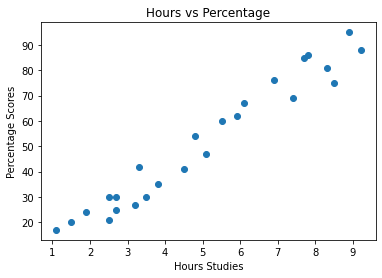

In [8]:
plt.scatter(df.Hours, df.Scores)
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studies")
plt.ylabel("Percentage Scores")
plt.show()

Above plot it is showing linear relationship between 'Hours Studied' and 'Percentage Score'
so in this context we can apply linear regression model to predict the further outcome.

### Data Preparation

Split the data into independent and dependent variable

In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [10]:
X, y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [11]:
# Split the data into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Training the model

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('Training Complete')

Training Complete


In [13]:
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [9.91065648]
Intercept: 2.018160041434662


### Plotting the Regression line

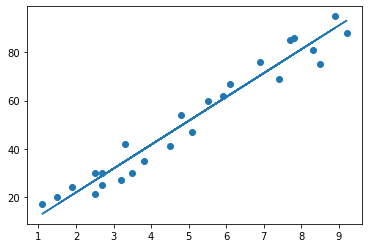

In [14]:
line = model.coef_*X + model.intercept_

plt.scatter(X,y)
plt.plot(X,line)
plt.show()

### Prediction

In [15]:
print(X_test)
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


y_pred array are the predicted values for the input X_test which is 20% of the data


In [16]:
# Lets Compare Actual Data with Predicted Data
df1 = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
# For 9.25 hours the predicted scores would be
hours = 9.25
own_pred = model.predict([[hours]])
print('Predicted Score if a student studies for 9.25 hours:', own_pred)

Predicted Score if a student studies for 9.25 hours: [93.69173249]


### Evaluating the Algorithm

In [18]:
from sklearn import metrics

In [19]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Squared Error: 21.598769307217456
Mean Absolute Error: 4.183859899002982
